In [1]:
!pip install faker

     |████████████████████████████████| 1.8 MB 4.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/kevinyang/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import faker

fake = faker.Faker()
df = pd.read_csv("/Users/kevinyang/Documents/QBS181/Cleaned Data/merged.csv")
df1 = pd.read_csv("/Users/kevinyang/Documents/QBS181/Cleaned Data/merged.csv")

In [2]:
# count missing cholesterol values
missing_cholesterol = df['Cholesterol'].isnull().sum()
missing_cholesterol

1369

<Axes: xlabel='Cholesterol', ylabel='Count'>

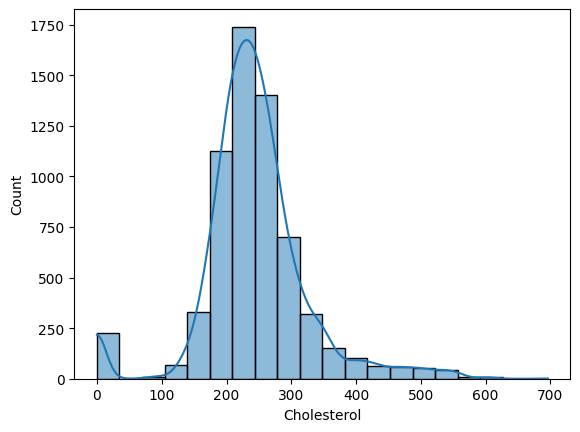

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Cholesterol'], bins=20, kde=True)

In [4]:
# Identify missing values in the cholesterol column
missing_indices = df[df['Cholesterol'].isnull()].index

# Calculate the 25th and 75th percentiles of the original cholesterol values
q25 = df['Cholesterol'].quantile(0.25)
q75 = df['Cholesterol'].quantile(0.75)

# Generate synthetic cholesterol values using Faker based on the 25th and 75th percentiles
synthetic_values = [fake.random_int(min=int(q25), max=int(q75)) for _ in range(len(missing_indices))]

# Fill the missing values with the generated synthetic data
df1.loc[missing_indices, 'Cholesterol'] = synthetic_values

In [5]:
# count missing cholesterol values
missing_cholesterol = df1['Cholesterol'].isnull().sum()
missing_cholesterol

0

<Axes: xlabel='Cholesterol', ylabel='Count'>

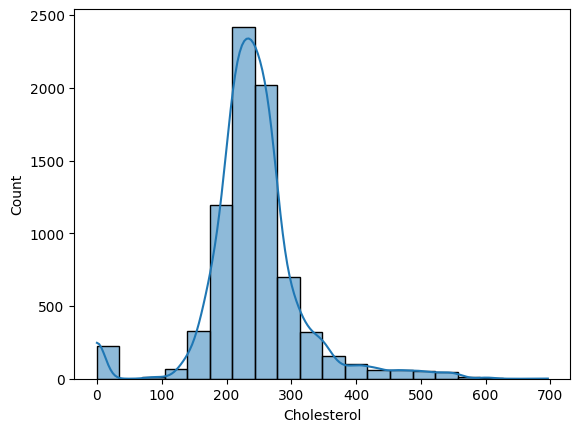

In [6]:
sns.histplot(df1['Cholesterol'], bins=20, kde=True)

In [9]:
df1.to_csv("/Users/kevinyang/Documents/QBS181/Synthesized Data/kevin_synthesis_data.csv", index=False)

In [20]:
print(df1.columns)
print(df.columns)

Index(['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar',
       'Max Heart Rate', 'Result', 'Source'],
      dtype='object')
Index(['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar',
       'Max Heart Rate', 'Result', 'Source'],
      dtype='object')


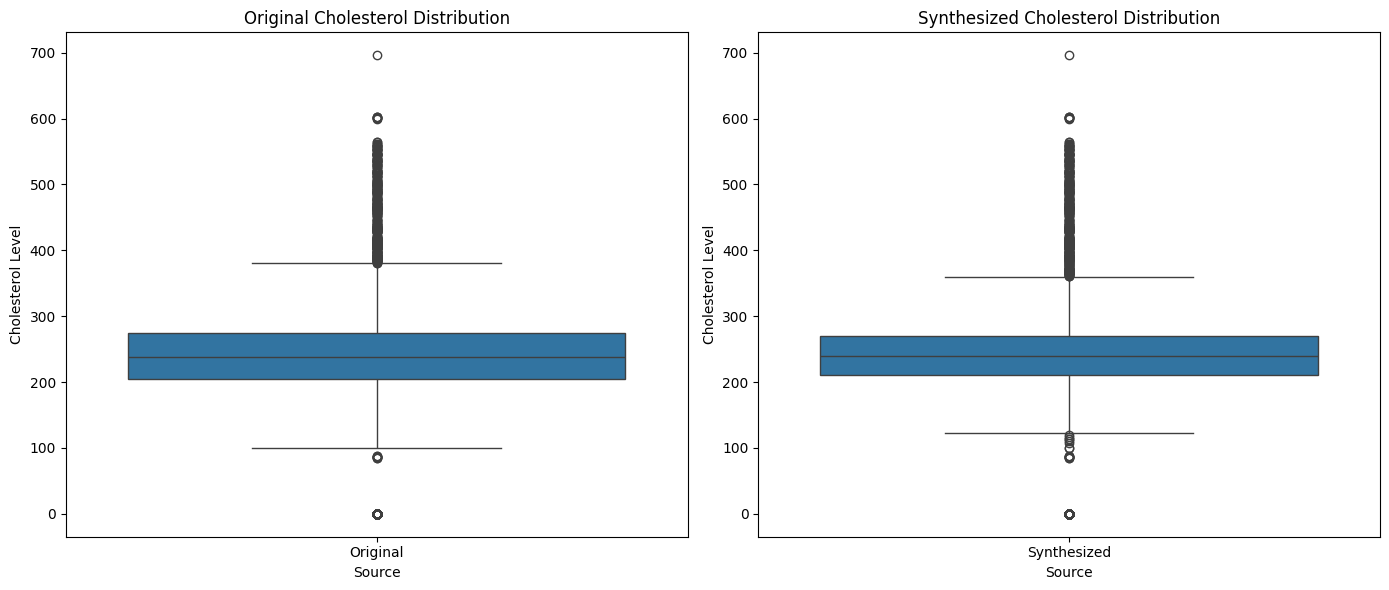

In [7]:
df['Source'] = 'Original'
df1['Source'] = 'Synthesized'
# Combine the datasets
df_combined = pd.concat([df, df1], axis=0)
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for the original dataset
sns.boxplot(x='Source', y='Cholesterol', data=df_combined[df_combined['Source'] == 'Original'], ax=axes[0])
axes[0].set_title('Original Cholesterol Distribution')
#axes[0].set_xlabel('Data Source')
axes[0].set_ylabel('Cholesterol Level')

# Boxplot for the synthesized dataset
sns.boxplot(x='Source', y='Cholesterol', data=df_combined[df_combined['Source'] == 'Synthesized'], ax=axes[1])
axes[1].set_title('Synthesized Cholesterol Distribution')
#axes[1].set_xlabel('Data Source')
axes[1].set_ylabel('Cholesterol Level')

plt.tight_layout()
plt.show()
